# DSCI 512 Lab 4: Graphs and Matrices (Cheat sheet)

### Instructions
rubric={mechanics:3}

Follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).

For T.6 you will need the NLTK package (if you don't have it already) as well as an NLTK corpus, which you can download using the code below

In [2]:
#provided code
#!python3 -m pip install nltk

import nltk
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/jungyeul/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

Packages and libraries that you may want to import for this lab:

In [3]:
#provided code
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import altair as alt
import numpy as np
import pandas as pd
from nltk.corpus import movie_reviews
from sklearn.feature_extraction import DictVectorizer

## Exercise T.5:  Degrees of separation (Lecture 5 Teamwork) 
rubric={accuracy:3,quality:1}

Write a function `distance_BFS` that takes in a NetworkX `Graph` and two nodes, and uses *breath*-first search (BFS) to compute the degrees of separation between the two nodes. If the two nodes are not connected, you should return *-1*. You can adapt relevent code from lecture, but you can't use any  built-in NetworkX functions other than `neighbors`.

Then, create a good test suite for your function. As part of this, you should build a new *directed* graph that has properties appropriate to your tests. Print out a copy of the graph so it is easy to eyeball that your results are correct.

In [6]:
def distance_BFS(g, node1, node2):
    # your code here 
    """ 
    Given a NetworkX Graph g, and start node node1 
    and goal node node2, distance_BFS returns the
    degree of separation between node1 and node2. 
    If they are not connected, returns -1.
    
    Arguments
    g -- (networkx.classes.graph.Graph) the graph
    node1 -- (str) first node
    node2 -- (str) second node
    """
    # your code here

    # put (push) the node1 into a queue
    # you also need a `visited` as `set()`


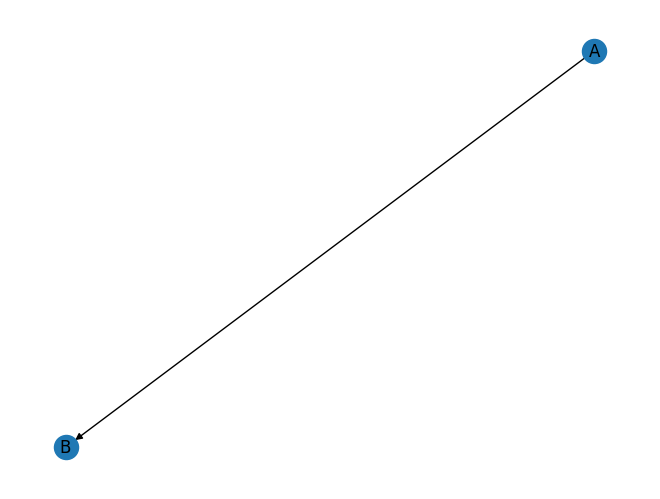

In [4]:
# build your graph here and print it out
# your code here
dg = nx.DiGraph()

dg.add_node("A")
dg.add_node("B")

dg.add_edge("A", "B") # A --> B

# ...
# your code here
nx.draw(dg, with_labels=True, arrowsize=10)

In [8]:
# tests here
# your code here
assert(distance_BFS(dg,"A","B")) == 1 # immediate neighbour

# ...
print("Success!")
# your code here

Success!


In [6]:
queue = [1,2]

print(queue.pop(0))
print(queue)

stack = [1,2]

print(stack.pop(-1))
print(stack)

1
[2]
2
[1]


## Exercise T.6: Sparse bigram matrices (Lecture 6 teamwork)
rubric={accuracy:3,efficiency:1,reasoning:1}

Use sklearn's `DictVectorizer` to create a sparse matrix where the rows correspond to sentences in a corpus of movie reviews (`movie_reviews`) found in the NLTK package, and the columns correspond to counts of lower-cased *bigrams* in that sentence, i.e. pairs of contiguous words (the bigrams for this sentence are "create a", "a sparse", "spare matrix", ...). After you have created the matrix, use it directly to extract the the following pieces of information:
- How many different kinds of bigrams are there (i.e. how many columns does the matrix have)?
- How many sentences does the bigram "the movie" appear in?
- How many non-zero elements of the matrix are there?
- What is the ratio of memory used for this sparse matrix as compared to a dense version which explicitly represents zeros?

For the last part, please briefly explain the reasoning for your calcuation!

The code for looping through the sentences is provided, each sentence is a list of strings corresponding to the words of the sentence

In [13]:
# #your code here

# #your code here

# for sentence in movie_reviews.sents():
#     # your code here
#     # 1. convert a sentence into the list of lower(): [w_0, w_1, ...., w_n-1, w_n]
#     # 2. make a bigram tuple (w_0,w_1), ... (w_n-1,w_n), and put them in a dict: `{'foo': 1, 'bar': 2}` (see below)
#     # 3. append dict to a list: `D`

# # your code here
# # DictVectorizer()
# # print `shape`
# # print number of nonzero values (`nnz`)

(65258, 448707)
1500151


In [12]:
# copied from https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html

from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)
D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]
#      |-- dict for sent0,   |-- dict for sent1 .... 
X = v.fit_transform(D)
print('bar, baz, foo:')
print(X)
print(X.shape)
# print(X.nnz) # it works without `sparse=False`

bar, baz, foo:
[[2. 0. 1.]
 [0. 1. 3.]]
(2, 3)


Answer:



## Exercise 1: The Romeo and Juliet graph

A graph or network represents relationships among things. The things are represented as _vertices_ (aka _nodes_), and the relationships are represented as _edges_.

The graph below represents the social network in Romeo & Juliet.

![](romeoandjulietundirected.png)

An edge between person A and person B means that A considers B a friend, and also B considers A a friend.

In the image above, ignore the gray background and the labels for the families ("houses"); those are there just to help you interpret the graph but are not part of the social network itself.

One interesting measure in a social network graph is the "distance" or number of "degrees of separation" between two people. This notion is used in academic research via the [Erdős number](https://en.wikipedia.org/wiki/Erd%C5%91s_number) and in the film industry via the [Bacon number](https://en.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon#Bacon_numbers). For example, in the above graph, the distance between Juliet and Romeo is 1, and the distance between Juliet and Paris is 2 (via Capulet).

The code below creates a graph named `rj` corresponding to the Romeo and Juliet graph above (ignoring the shaded family/house information).

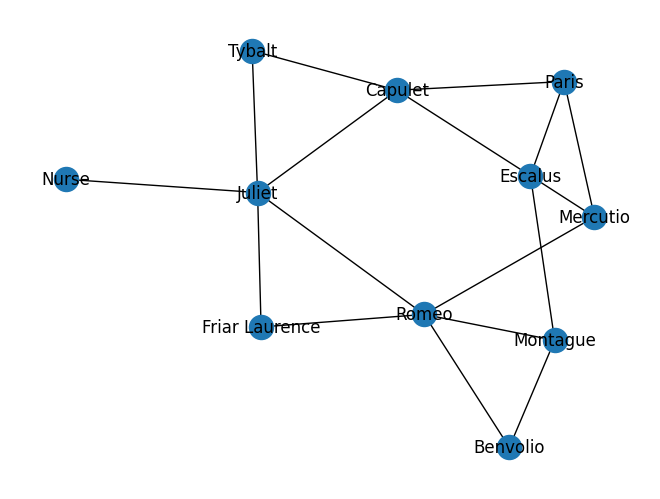

In [17]:
#provided code
rj = nx.Graph()
rj.add_nodes_from(['Nurse', 
                   # House of Capulet
                   'Juliet', 'Tybalt', 'Capulet',
                   
                   'Friar Laurence', 
                   
                   # House Montague
                   'Romeo', 'Benvolio', 'Montague',
                   
                   # Ruling house of Verona
                   'Escalus', 'Mercutio', 'Paris'
                  ])

rj.add_edges_from([('Juliet', 'Nurse'),
                   ('Juliet', 'Tybalt'),
                   ('Juliet', 'Capulet'),                   
                   ('Juliet', 'Friar Laurence'),
                   ('Juliet', 'Romeo'),
                   
                   ('Capulet', 'Tybalt'),                                      
                   ('Capulet', 'Escalus'),
                   ('Capulet', 'Paris'),                   
                   
                   ('Romeo', 'Friar Laurence'),
                   ('Romeo', 'Benvolio'),
                   ('Romeo', 'Montague'),
                   ('Romeo', 'Mercutio'),                   
                   
                   ('Montague', 'Benvolio'),
                   ('Montague', 'Escalus'),                   

                   ('Escalus', 'Mercutio'),
                   ('Escalus', 'Paris'),
                   ('Paris', 'Mercutio')
                  ])

nx.draw(rj, with_labels=True)

#### 1(a)
rubric={accuracy:2,efficiency:1}

Write a function `highest_degree` that takes in a graph and finds the vertex/vertices with the highest degree - in other words, the person with the largest number of friends. Your function should return a tuple with two elements:

1. The maximum degree (int)
2. All the nodes with that degree (set)

Note: you can find the degree of a vertex using the following syntax:

In [63]:
# provided code
print(nx.degree(rj, "Paris"))
print(nx.degree(rj, "Juliet"))
print(nx.degree(rj, "Nurse"))

3
5
1


In [68]:
def highest_degree(G):
    """
    Finds the vertices with the highest degree in the graph G.
    Returns a tuple (max_degree, {nodes with that degree})
    """
    # your code here 
    # ...
    for node in G.nodes():
        degree = nx.degree(G, node)    
        # if degree > max_degree, ... 


In [69]:
max_degree, nodes = highest_degree(rj)
print(nodes)
assert nodes == {"Romeo", "Juliet"}
assert max_degree == 5
print("Success!")

{'Romeo', 'Juliet'}
Success!


#### 1(b)
rubric={accuracy:3,efficiency:1}

Write a function `largest_distance` to find the pair(s) of vertices with the largest distance (degree of separation). Your function should return a tuple with two elements:

1. The maximum distance (int)
2. All the pairs of nodes with that distance (set of tuples)

Note: do not include pairs twice. For example, if `('Romeo', 'Juliet')` is in the set, don't also include `('Juliet', 'Romeo')`.

Note: you will find [`nx.shortest_path_length`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html#networkx.algorithms.shortest_paths.generic.shortest_path_length) useful.

In [15]:
def largest_distance(G):
    """
    Finds the pairs of vertices with the highest degree of separation in the graph G.
    Returns a tuple (max_distance, {node pairs with that degree})
    """

    # ...

    return max_distance, max_vertex_pairs
    #your code here


In [18]:
max_distance, pairs = largest_distance(rj)
assert max_distance == 3
assert len(pairs) == 12
print("Success!")
print(pairs)

Success!
{('Nurse', 'Montague'), ('Tybalt', 'Benvolio'), ('Nurse', 'Escalus'), ('Nurse', 'Mercutio'), ('Tybalt', 'Montague'), ('Friar Laurence', 'Escalus'), ('Benvolio', 'Paris'), ('Tybalt', 'Mercutio'), ('Nurse', 'Benvolio'), ('Friar Laurence', 'Paris'), ('Nurse', 'Paris'), ('Capulet', 'Benvolio')}


## Exercise 2: Using Facebook data

We will use some Facebook data, which is the file `facebook-links.txt` in the [datasets repository](https://github.ubc.ca/MDS-2020-21/datasets). 


The `facebook-links.txt` file is courtesy of the Max Planck Institute for Software Systems. Here is a slightly clarified version of the documentation for this file:

> File `facebook-links.txt` contains a list of all of the user-to-user links from the Facebook New Orleans networks. These links are undirected on Facebook.
>
> Format: Each line contains two numeric user identifiers, meaning the second user appeared in the first user's friend list, and the first user appeared in the second user's friend list. Finally, the third column is a UNIX timestamp with the time of link establishment (if it could be determined, otherwise it is '\N'). Note: a Unix timestamp is the number of seconds since January 1, 1970. You may ignore it in this assignment. 


The code below creates a graph named facebook from the Facebook data in file `facebook-links.txt`. Please put `facebook-links.txt` outside your lab repo (don't submit it!) and modify the path appropriately. 

In [20]:
# !brew install wget 
# !wget https://raw.github.ubc.ca/mds-2021-22/datasets/master/data/facebook-links.txt?token=GHSAT0AAAAAAAAAB5MGIWX4TVP3OMPUT63WY27LKHA -O facebook-links.tx

In [23]:
#provided code
facebook_edges = pd.read_csv("facebook-links.txt", sep='\t')
facebook_edges.columns = ["from", "to", "timestamp"]
facebook_edges.head()

,from,to,timestamp
0,1,3,\N
1,1,4,\N
2,1,5,\N
3,1,6,\N
4,1,7,\N


In [24]:
#provided code
facebook_graph = nx.convert_matrix.from_pandas_edgelist(facebook_edges, "from", "to")

In [25]:
assert len(facebook_graph.nodes()) == 63731
assert len(facebook_graph.edges()) == 817090


#### 2(a)
rubric={accuracy:1,viz:1,efficiency:1}

Create a histogram of the node degrees in this graph. Make sure you use enough bins so you can see the general shape of things

Note: the `networkx` library can get you the [adjacency matrix](https://networkx.github.io/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html) of the graph, which may be useful here.  You can use either Altair or Matplotlib for this.

In [26]:
import matplotlib.pyplot as plt

# adjacency_matrix = nx.adjacency_matrix(...)

In [27]:
adjacency_matrix.shape

(63731, 63731)

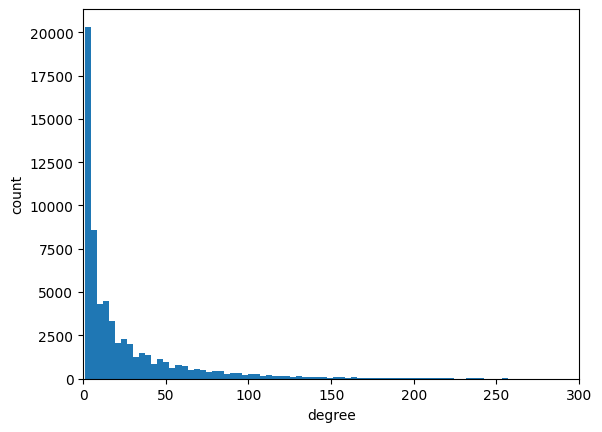

In [36]:
degrees = np.sum(...)
plt.hist(degrees,bins=...)
plt.xlim(...)
plt.xlabel("degree")
plt.ylabel("count")
plt.show()

#### 2(b)
rubric={accuracy:1,efficiency:1}

To summarize the histogram further, find the mean, median, and mode of the vertex degrees.

**HINT**: If you haven't already, it is a good idea to create a numpy array containing the degree for each node. You may have to convert from a sparse matrix if you are starting from the adjacency matrix.

In [26]:
from scipy.stats import mode

degrees = np.asarray(degrees).flatten()
print("mean")
print(np.mean)
print("median")
print(np.median)
print("mode")
print(mode) # stats.mode

mean
25.641838351822503
median
10.0
mode
1


/var/folders/n9/3r6hrp015t9d1n6m8l36t0yh0000gn/T/ipykernel_43312/4012138328.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(mode(degrees).mode[0])


#### 2(c) optional
rubric={reasoning:1}

Earlier you wrote the `largest_distance` function that computest the largest distance between any pair of nodes. The time complexity of this function is $O(V^2)$ if there are $V$ vertices; this is going to be too slow for the Facebook graph (you are welcome to try it...). Can you try to approximate/estimate what this largest distance among connected nodes might be? 

Note: there are a lot of ways to approach this question!

In [27]:
# try taking a bunch of random pairs and computing their distance


The maximum distance found is 9, with nodes [49823 57392]


## Exercise 3: Sparse graph representations

#### 3(a)
rubric={reasoning:1}

What is the space complexity of an adjacency matrix stored as a dense matrix, as a function of the number of vertices $V$ and/or the number of edges $E$? 

Answer:


#### 3(b)
rubric={reasoning:1}

According to the documentation, NetworkX returns the adjacency matrix as a SciPy sparse matrix. What is the space complexity of this sparse adjacency matrix, as a function of the number of vertices $V$ and/or the number of edges $E$? 

Answer:


#### 3(c)
rubric={reasoning:1}

The code below measures the storage usage for the adjacency matrix of the Romeo and Juliet data. Are they what you expected, if each stored number takes up 8 bytes (64-bits)? 

In [28]:
#provided code
sparse_matrix = nx.adjacency_matrix(rj)
dense_matrix = sparse_matrix.toarray()

print("Size of sparse matrix:", sparse_matrix.data.nbytes, "bytes")

print("Size of dense  matrix:", dense_matrix.nbytes, "bytes")

Size of sparse matrix: 272 bytes
Size of dense  matrix: 968 bytes


/var/folders/n9/3r6hrp015t9d1n6m8l36t0yh0000gn/T/ipykernel_43312/1786711826.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  sparse_matrix = nx.adjacency_matrix(rj)


Answer:


#### 3(d)
rubric={reasoning:1}

How many bytes do you think the dense form of the Facebook adjacency matrix would take, if each element takes 8 bytes? (If you try it, you may well run out of memory).

Answer:


32493122888